<a href="https://colab.research.google.com/github/MoonlightO2/Wine-Data-Quality-Project/blob/main/Best_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Data Analysis**
***Datasets***: My dataset

***Article***: https://ai.plainenglish.io/prediction-of-a-wine-brands-quality-based-on-the-chemical-composition-of-the-products-using-c5727f8d4289

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Wine Quality/Wine.csv'

In [3]:
data = pd.read_csv(data_path)
print('Shape: ', data.shape, '\n')
print('Columns: ', data.columns.tolist(), '\n')
data.head()

Shape:  (7640, 15) 

Columns:  ['Name', 'Colour', 'Country', 'Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality'] 



,Name,Colour,Country,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,Vinho Verde,Red,Portugal,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Vinho Verde,Red,Portugal,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Vinho Verde,Red,Portugal,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Vinho Verde,Red,Portugal,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Vinho Verde,Red,Portugal,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000
mean,7.379247,0.368342,0.311113,5.007716,0.060657,28.294699,105.297513,0.995001,3.232342,0.550185,10.484367,5.794241
std,1.427803,0.180411,0.155121,4.539029,0.038719,17.660597,59.142368,0.002954,0.163531,0.158761,1.176904,0.865367
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.240000,0.240000,1.800000,0.040000,15.000000,52.750000,0.992737,3.120000,0.440000,9.500000,5.000000
50%,7.100000,0.320000,0.300000,2.600000,0.050000,26.000000,109.000000,0.995340,3.220000,0.530000,10.300000,6.000000
75%,7.900000,0.460000,0.400000,7.350000,0.075000,39.000000,149.000000,0.997200,3.340000,0.620000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Text(0.5, 1.0, 'Wine Type vs Residual Sugar')

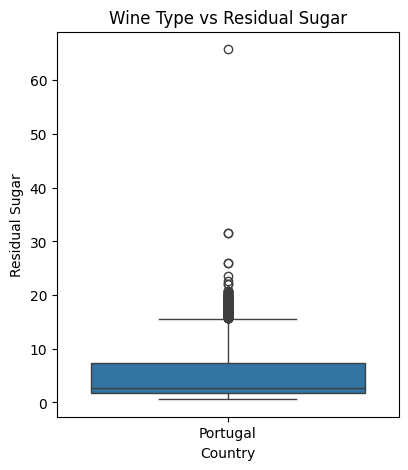

In [5]:
# Plots
plt.figure(figsize=(15, 5))

# Wine Type vs Residual Sugar
plt.subplot(1, 3, 1)
sns.boxplot(x='Country', y='Residual Sugar', data=data)
plt.title('Wine Type vs Residual Sugar')

Text(0.5, 1.0, 'Wine Type vs Sulphur Dioxide Content')

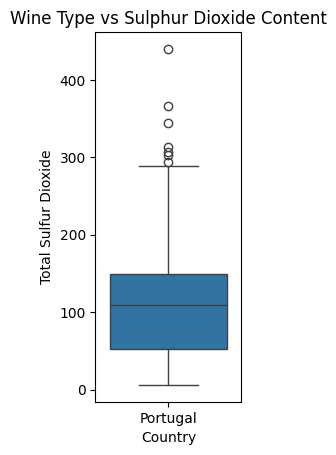

In [6]:
# Wine Type vs Sulphur Dioxide Content
plt.subplot(1, 3, 2)
sns.boxplot(x='Country', y='Total Sulfur Dioxide', data=data)
plt.title('Wine Type vs Sulphur Dioxide Content')

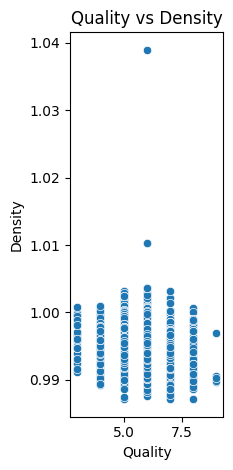

In [7]:
# Quality vs Density
plt.subplot(1, 3, 3)
sns.scatterplot(x='Quality', y='Density', data=data)
plt.title('Quality vs Density')

plt.tight_layout()
plt.show()

<ipython-input-8-01a6fe9d9c8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


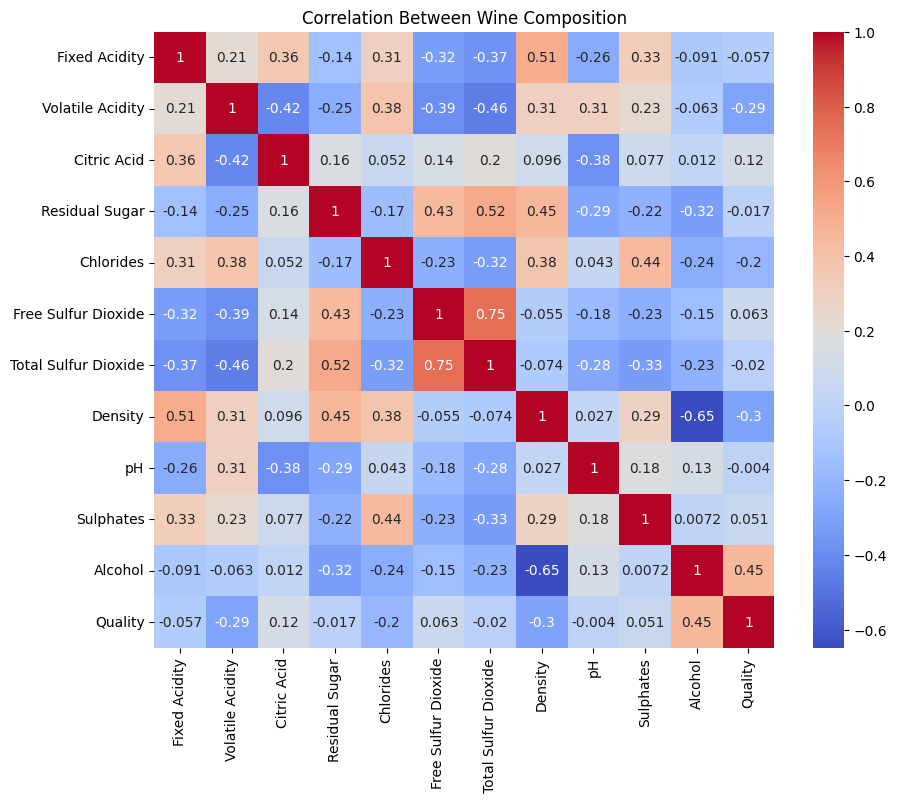

In [8]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Wine Composition')
plt.show()

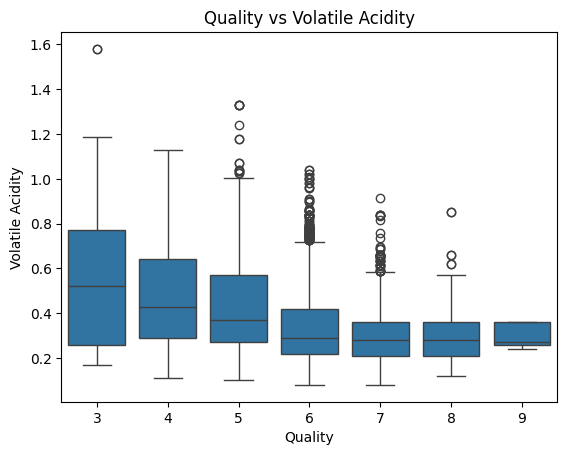

In [9]:
# Quality vs Volatile Acidity
sns.boxplot(x='Quality', y='Volatile Acidity', data=data)
plt.title('Quality vs Volatile Acidity')
plt.show()

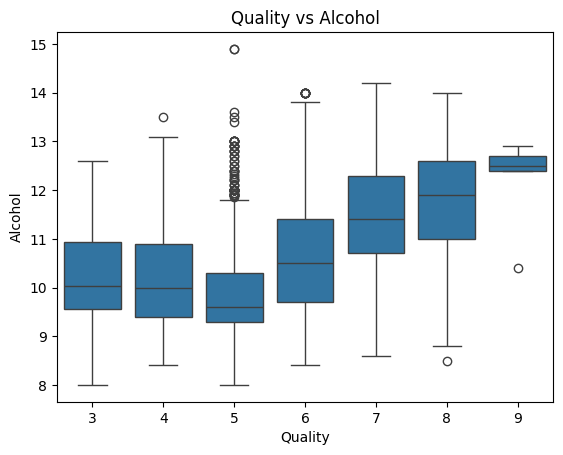

In [10]:
# Quality vs Alcohol
sns.boxplot(x='Quality', y='Alcohol', data=data)
plt.title('Quality vs Alcohol')
plt.show()

In [11]:
# Linear Regression
X = data[['Density', 'pH', 'Sulphates', 'Alcohol']]
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictions
y_pred_lr = model_lr.predict(X_test)

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [13]:
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")

Linear Regression Mean Squared Error: 0.6340740837550423
Decision Tree Classifier Accuracy: 0.694371727748691
